In [133]:
import kagglehub
import os
import shutil
import pandas as pd
import numpy as np

DATA_DIR = "./data"

In [134]:
os.makedirs(DATA_DIR, exist_ok=True)
path = kagglehub.dataset_download(
    handle = "thedevastator/youtube-video-and-channel-analytics"
)

print("Path to dataset files downloaded at:", path)

for file_name in os.listdir(path):
    source = path + file_name
    destination = DATA_DIR + file_name
    if os.path.isfile(source):
        shutil.move(source, destination)
        print('Moved:', file_name)

print("Dataset moved to: ", DATA_DIR)


Path to dataset files downloaded at: C:\Users\ADMIN\.cache\kagglehub\datasets\thedevastator\youtube-video-and-channel-analytics\versions\1
Dataset moved to:  ./data


## Data Reading

In [135]:
DATA_DIR = os.path.join(DATA_DIR, "1", "YouTubeDataset_withChannelElapsed.csv")
df_yt = pd.read_csv(DATA_DIR)
df_yt

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575605,575605,259.123802,UCoBsEPCif0cJr0XoH9vKVsA,10,25342567,0.011829,2.577992,3783,7270,2YwZKSyX5Pg,...,0.000534,6699.066085,49752,86,2,0.000275,3485.910179,0.376708,2012-02-01T04:01:17.000Z,10
575606,575606,0.322689,UC2AFyZm1gI81faexxhq5Mzg,2,30599,2.333333,4989.000000,15,3,2Y8Rtvd8cHc,...,-1.000000,2039.933333,93745,7,2,0.666667,10199.666667,0.159657,2007-01-25T14:38:49.000Z,-1
575607,575607,2.174518,UCXRQyRCOq8SwupXXqQ3mgAA,28,103855,0.227273,276.909091,61,22,2YhOrl3fzCM,...,0.000164,1702.540984,41496,5,9,0.409091,4720.681818,0.146809,2013-01-10T07:20:03.000Z,1
575608,575608,5.044453,UCtWqVyrfT_CrVeNx0UM4RjQ,24,363927,0.069519,10.331551,258,187,2Y3a5eS_q2s,...,0.002070,1410.569767,38352,13,1,0.005348,1946.133690,0.050375,2013-05-20T18:33:03.000Z,4


In [136]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index                          575610 non-null  int64  
 1   totalviews/channelelapsedtime  575610 non-null  float64
 2   channelId                      575610 non-null  object 
 3   videoCategoryId                575610 non-null  int64  
 4   channelViewCount               575610 non-null  int64  
 5   likes/subscriber               575610 non-null  float64
 6   views/subscribers              575610 non-null  float64
 7   videoCount                     575610 non-null  int64  
 8   subscriberCount                575610 non-null  int64  
 9   videoId                        575610 non-null  object 
 10  dislikes/views                 575610 non-null  float64
 11  channelelapsedtime             575610 non-null  int64  
 12  comments/subscriber           

In [137]:
df_yt['videoId'].unique()

array(['--DwgB78t-c', '--NZRkXBV7k', '--hoQ2sGG4M', ..., '2YhOrl3fzCM',
       '2Y3a5eS_q2s', '2Y4e4gwEhaU'], shape=(555627,), dtype=object)

In [138]:
duplicate_count = df_yt.duplicated(subset=['videoId']).sum()
print(f"Total duplicate videoId entries: {duplicate_count}")

Total duplicate videoId entries: 19983


#### Aggregation for duplicated videos with the same videoId

In [139]:
agg_logic = {col: 'first' for col in df_yt.columns if col != 'videoId'}
df_unique = df_yt.groupby('videoId', as_index=False).agg(agg_logic)

In [140]:
# Second check
duplicate_count = df_unique.duplicated(subset=['videoId']).sum()
print(f"Total duplicate videoId entries: {duplicate_count}")

Total duplicate videoId entries: 0


In [141]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555627 entries, 0 to 555626
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   videoId                        555627 non-null  object 
 1   index                          555627 non-null  int64  
 2   totalviews/channelelapsedtime  555627 non-null  float64
 3   channelId                      555627 non-null  object 
 4   videoCategoryId                555627 non-null  int64  
 5   channelViewCount               555627 non-null  int64  
 6   likes/subscriber               555627 non-null  float64
 7   views/subscribers              555627 non-null  float64
 8   videoCount                     555627 non-null  int64  
 9   subscriberCount                555627 non-null  int64  
 10  dislikes/views                 555627 non-null  float64
 11  channelelapsedtime             555627 non-null  int64  
 12  comments/subscriber           

## Average likes

In [142]:
avg_like = np.average(df_unique['videoLikeCount'])
with open('Answers.txt', 'w') as file:
    file.write(str(avg_like) + "\n")

## Average Engagement

#### Element wise for dataframe (each vid)

In [143]:
total_interactions = df_unique['videoLikeCount'] + df_unique['videoDislikeCount'] + df_unique['VideoCommentCount']

df_unique['EngagementRate'] = np.where(
    df_unique['videoViewCount'] > 0, 
    total_interactions / df_unique['videoViewCount'], 
    0
)

<Axes: >

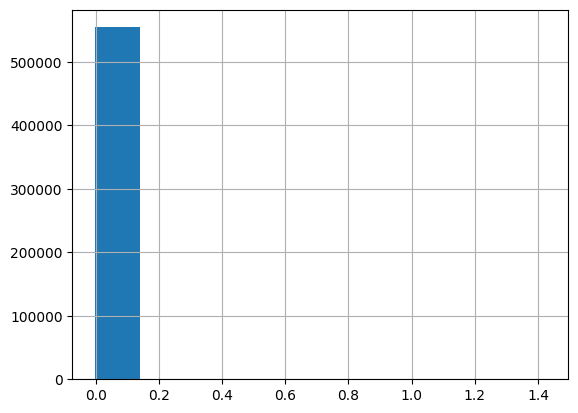

In [144]:
df_unique['EngagementRate'].hist()

#### Average over the whole dataset

In [145]:
avg_engagement = np.average(df_unique['EngagementRate'])
print(avg_engagement)
with open('Answers.txt', 'a') as file:
    file.write(str(np.round(avg_engagement, 4)) + "\n")

0.008413933878639784


(Graded correct until this block)

## Combined storage size for a single video in megabytes (MB)

In [146]:
metadata_per_vid = 500
thumbnail_per_vid = 200*(10**3)

combined_storage_per_vid = np.round((metadata_per_vid + thumbnail_per_vid) / (10**6), 4)
print(f"Combined storage size per vid: {combined_storage_per_vid}")
with open('Answers.txt', 'a') as file:
    file.write(str(combined_storage_per_vid) + "\n")


Combined storage size per vid: 0.2005


## Total data transfer required for all engagements with videos in the dataset

In [147]:
total_data_transfer = total_interactions.sum() * combined_storage_per_vid
print(f"Total Data Transfer: {total_data_transfer}")
with open('Answers.txt', 'a') as file:
    file.write(str(total_data_transfer) + "\n")

Total Data Transfer: 39089974.032000005


## Number of views per minute

In [148]:
mins_in_five_years = 5*365*24*60
total_views = df_unique['videoViewCount'].sum()
views_per_min = total_views/mins_in_five_years
print(f"Number of views per minute: {views_per_min}")
with open('Answers.txt', 'a') as file:
    file.write(str(views_per_min) + "\n")

Number of views per minute: 12473.220591324201


## Number of data accessed per minute

In [149]:
data_accessed_per_min = total_data_transfer/mins_in_five_years
print(f"Amount of data accessed per minute: {data_accessed_per_min}")
with open('Answers.txt', 'a') as file:
    file.write(str(data_accessed_per_min) + "\n")

Amount of data accessed per minute: 14.874419342465755
